### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

%matplotlib inline

sns.set_style()

### Import the dataset

In [2]:
raw_data = pd.read_csv('online_retail.csv')

In [3]:
tableau_data = raw_data
raw_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011/12/9 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011/12/9 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011/12/9 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011/12/9 12:50,4.15,12680.0,France


### Data inspection and Data cleaning

In [4]:
#Check for missing 
raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#drop the missing values
raw_data = raw_data.dropna()
raw_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
#Check for duplicate
raw_data.duplicated().sum()

5225

In [7]:
raw_data.drop_duplicates(inplace=True)

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
raw_data.duplicated().sum()

0

In [9]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom


#### Descriptive analytics.

In [10]:
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [12]:
#get the order by country
group_by_country = raw_data.groupby(['Country']).agg({'CustomerID':'count', 'UnitPrice':'mean', 'Quantity':'sum'
                                  })

In [13]:
group_by_country.sort_values('CustomerID', ascending=False).head()

,CustomerID,UnitPrice,Quantity
Country,,,
United Kingdom,356728,3.268255,3994870
Germany,9480,3.969772,117341
France,8475,5.053124,109806
EIRE,7475,5.111607,136187
Spain,2528,4.992682,26817


The country with the most customer United Kingdom is Germany.

In [14]:
group_by_country.sort_values('Quantity', ascending=False).head()

,CustomerID,UnitPrice,Quantity
Country,,,
United Kingdom,356728,3.268255,3994870
Netherlands,2371,2.738317,200128
EIRE,7475,5.111607,136187
Germany,9480,3.969772,117341
France,8475,5.053124,109806


The country with the most order beside United Kingdom is Netherlands.

#### Cohort Analysis

In [15]:
#converte the InvoiceDate column to datetime
raw_data.InvoiceDate = pd.to_datetime(raw_data.InvoiceDate).dt.date
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [17]:
raw_data.InvoiceDate = pd.to_datetime(raw_data.InvoiceDate)
raw_data.info()

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [18]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [19]:
#get the transaction month
def extract_month(x):
    return dt.datetime(x.year,x.month,1)

raw_data['TransactionMonth']= raw_data.InvoiceDate.apply(extract_month)

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
raw_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-12-01


In [21]:
#let's get the cohort month
cohort_group = raw_data.groupby('CustomerID')['TransactionMonth']

raw_data['CohortMonth'] =cohort_group.transform('min')

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         401604 non-null  object        
 1   StockCode         401604 non-null  object        
 2   Description       401604 non-null  object        
 3   Quantity          401604 non-null  int64         
 4   InvoiceDate       401604 non-null  datetime64[ns]
 5   UnitPrice         401604 non-null  float64       
 6   CustomerID        401604 non-null  float64       
 7   Country           401604 non-null  object        
 8   TransactionMonth  401604 non-null  datetime64[ns]
 9   CohortMonth       401604 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 33.7+ MB


In [23]:
#get the cohort index for each trasaction
def cohort_index(x):
    d1 = x.TransactionMonth
    d2 = x.CohortMonth
    
    index = (d1.year - d2.year)*12 + (d1.month - d2.month) + 1
    
    return index

In [24]:
raw_data['CohortIndex'] = raw_data.apply(lambda x: cohort_index(x), axis=1)
raw_data

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01,5


In [25]:
#let's group the date base on customer id and date
group_data =raw_data.groupby(['InvoiceDate','CustomerID']).agg({'Description':'max', 'Quantity':'sum', 'UnitPrice':'sum',
                                          'Country':'max','TransactionMonth':'max','CohortMonth':'max','CohortIndex':'max' })
group_data

Description  Quantity  UnitPrice  \
InvoiceDate CustomerID                                                          
2010-12-01  12431.0     VINTAGE UNION JACK CUSHION COVER       107      73.90   
            12433.0          WOODEN SCHOOL COLOURING SET      1852     102.67   
            12472.0          TRIPLE PHOTO FRAME CORNICE        -40      49.45   
            12583.0       VINTAGE SEASIDE JIGSAW PUZZLES       449      55.29   
            12662.0              SET OF 6 T-LIGHTS SANTA       157      44.37   
...                                                  ...       ...        ...   
2011-12-09  17428.0              SET 10 NIGHT OWL LIGHTS        56      23.00   
            17490.0               WALL ART GARDEN HAVEN        462      41.42   
            17581.0            VINTAGE CHRISTMAS BUNTING       516      76.81   
            17754.0               VANILLA INCENSE IN TIN       381      15.07   
            18102.0           HOME SWEET HOME BLACKBOARD       144       3.26   

                               Country TransactionMonth CohortMonth  \
InvoiceDate CustomerID                                                
2010-12-01  12431.0          Australia       2010-12-01  2010-12-01   
            12433.0             Norway       2010-12-01  2010-12-01   
            12472.0            Germany       2010-12-01  2010-12-01   
            12583.0             France       2010-12-01  2010-12-01   
            12662.0            Germany       2010-12-01  2010-12-01   
...                                ...              ...         ...   
2011-12-09  17428.0     United Kingdom       2011-12-01  2010-12-01   
            17490.0     United Kingdom       2011-12-01  2011-06-01   
            17581.0     United Kingdom       2011-12-01  2010-12-01   
            17754.0     United Kingdom       2011-12-01  2011-03-01   
            18102.0     United Kingdom       2011-12-01  2010-12-01   

                        CohortIndex  
InvoiceDate CustomerID               
2010-12-01  12431.0               1  
            12433.0               1  
            12472.0               1  
            12583.0               1  
            12662.0               1  
...                             ...  
2011-12-09  17428.0              13  
            17490.0               7  
            17581.0              13  
            17754.0              10  
            18102.0              13  

[19296 rows x 7 columns]

In [26]:
group_data.index

MultiIndex([('2010-12-01', 12431.0),
            ('2010-12-01', 12433.0),
            ('2010-12-01', 12472.0),
            ('2010-12-01', 12583.0),
            ('2010-12-01', 12662.0),
            ('2010-12-01', 12748.0),
            ('2010-12-01', 12791.0),
            ('2010-12-01', 12838.0),
            ('2010-12-01', 12868.0),
            ('2010-12-01', 12921.0),
            ...
            ('2011-12-09', 16954.0),
            ('2011-12-09', 17001.0),
            ('2011-12-09', 17315.0),
            ('2011-12-09', 17364.0),
            ('2011-12-09', 17389.0),
            ('2011-12-09', 17428.0),
            ('2011-12-09', 17490.0),
            ('2011-12-09', 17581.0),
            ('2011-12-09', 17754.0),
            ('2011-12-09', 18102.0)],
           names=['InvoiceDate', 'CustomerID'], length=19296)

In [27]:
#Create month cohorts and analyse active  customers for each cohor
cohort_data = raw_data.groupby(['CohortIndex','CohortMonth'])['CustomerID'] .apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data

#create a pivot table
cohort_table = cohort_data.pivot(index='CohortMonth',
                                columns='CohortIndex',
                                values='CustomerID')

In [28]:
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Analyse the retention rate of customers
cohort_size =cohort_table.iloc[:,0]
cohort_size

CohortMonth
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1, dtype: float64

In [30]:
retention_table = cohort_table.divide(cohort_size, axis=0)
retention_table = (retention_table.round(3) *100).round(2)

retention_table[10][1]
retention_table.index = retention_table.index.strftime('%Y-%m')

In [31]:
retention_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


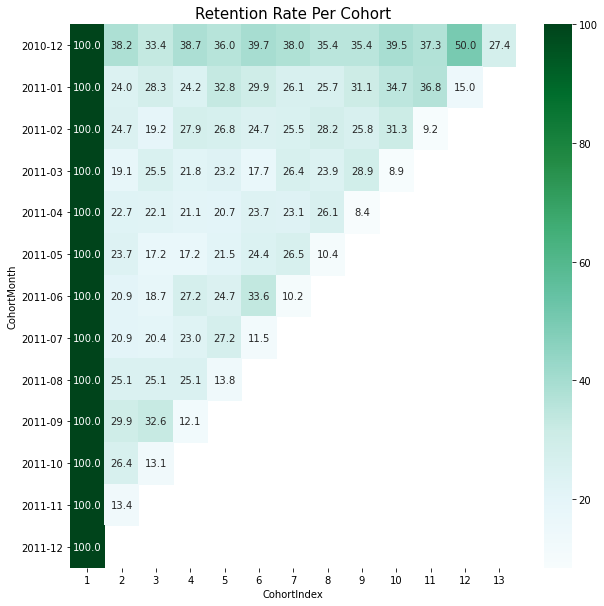

In [32]:
#heatmap
plt.figure(figsize=(10,10))
plt.title('Retention Rate Per Cohort', fontsize=15)
sns.heatmap(retention_table, annot=True, fmt='', cmap='BuGn')
plt.show()

##### Comment

With this table we can see 50% of custermer who were active on december 2010 are active 12 months later.

### Build a RFM model – Recency Frequency and Monetary

##### Calculate RFM metrics

In [33]:
raw_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [34]:
#get the last date in the data set
#we will use it as the actual date 
#the number of days simce last transaction will be the difference between the actual date and the date of the last transaction

actual_date = raw_data.InvoiceDate.sort_values(ascending=False).max()
actual_date

Timestamp('2011-12-09 00:00:00')

In [35]:
#group the date base on the customer id on take their last day transaction
customer_table = raw_data.groupby(['CustomerID']).agg({'Quantity':'sum', 'UnitPrice':'sum','InvoiceDate':'max'
                                     })
customer_table

,Quantity,UnitPrice,InvoiceDate
CustomerID,,,
12346.0,0,2.08,2011-01-18
12347.0,2458,481.21,2011-12-07
12348.0,2341,178.71,2011-09-25
12349.0,631,605.10,2011-11-21
12350.0,197,65.30,2011-02-02
...,...,...,...
18280.0,45,47.65,2011-03-07
18281.0,54,39.36,2011-06-12
18282.0,98,62.68,2011-12-02


In [36]:
recency_table = raw_data.groupby(['CustomerID']).agg({'InvoiceDate':'max'})
recency_table

,InvoiceDate
CustomerID,
12346.0,2011-01-18
12347.0,2011-12-07
12348.0,2011-09-25
12349.0,2011-11-21
12350.0,2011-02-02
...,...
18280.0,2011-03-07
18281.0,2011-06-12
18282.0,2011-12-02


In [37]:
#Recency as the time in no. of days since last transaction
recency_table['Number_of_day'] = actual_date - recency_table.InvoiceDate
recency_table

,InvoiceDate,Number_of_day
CustomerID,,
12346.0,2011-01-18,325 days
12347.0,2011-12-07,2 days
12348.0,2011-09-25,75 days
12349.0,2011-11-21,18 days
12350.0,2011-02-02,310 days
...,...,...
18280.0,2011-03-07,277 days
18281.0,2011-06-12,180 days
18282.0,2011-12-02,7 days


In [38]:
#Frequency as  count of purchases done 
frequancy_table = raw_data.groupby(['CustomerID']).agg({'Quantity':'sum'})

frequancy_table

,Quantity
CustomerID,
12346.0,0
12347.0,2458
12348.0,2341
12349.0,631
12350.0,197
...,...
18280.0,45
18281.0,54
18282.0,98


In [39]:
#Monetary value  as total amount spend 

#let's get the total sales for each transaction
raw_data['Total_sales'] = raw_data['Quantity'] * raw_data['UnitPrice']
raw_data

monetary_table = raw_data.groupby(['CustomerID']).agg({'Total_sales':'sum'})
monetary_table

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Total_sales
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


##### Build RFM Segments.

In [40]:
RFM_table = pd.concat([recency_table,frequancy_table,monetary_table],axis=1,
join="outer")

#RFM_table = RFM_table.drop('InvoiceDate',axis=1)
RFM_table

,InvoiceDate,Number_of_day,Quantity,Total_sales
CustomerID,,,,
12346.0,2011-01-18,325 days,0,0.00
12347.0,2011-12-07,2 days,2458,4310.00
12348.0,2011-09-25,75 days,2341,1797.24
12349.0,2011-11-21,18 days,631,1757.55
12350.0,2011-02-02,310 days,197,334.40
...,...,...,...,...
18280.0,2011-03-07,277 days,45,180.60
18281.0,2011-06-12,180 days,54,80.82
18282.0,2011-12-02,7 days,98,176.60


In [41]:
# Calculating RFM groups,labels and quartiles with the qcut function  

Rlabel = range(4,0,-1)
Flabel = range(1,5)
Mlabel = range(1,5)


#Give Recency Frequency and Monetary scores individually by dividing them in to quartiles.
recency_group = pd.qcut(RFM_table['Number_of_day'] , q=4, labels=Rlabel)
frequancy_group = pd.qcut(RFM_table['Quantity'], q=4, labels=Flabel)
monetary_group = pd.qcut(RFM_table['Total_sales'], q=4, labels=Mlabel)

In [42]:
RFM_table['R_rate']= recency_group
RFM_table['F_rate']= frequancy_group
RFM_table['M_rate']= monetary_group

RFM_table

,InvoiceDate,Number_of_day,Quantity,Total_sales,R_rate,F_rate,M_rate
CustomerID,,,,,,,
12346.0,2011-01-18,325 days,0,0.00,1,1,1
12347.0,2011-12-07,2 days,2458,4310.00,4,4,4
12348.0,2011-09-25,75 days,2341,1797.24,2,4,4
12349.0,2011-11-21,18 days,631,1757.55,3,3,4
12350.0,2011-02-02,310 days,197,334.40,1,2,2
...,...,...,...,...,...,...,...
18280.0,2011-03-07,277 days,45,180.60,1,1,1
18281.0,2011-06-12,180 days,54,80.82,1,1,1
18282.0,2011-12-02,7 days,98,176.60,4,1,1


In [43]:
#Combine three ratings to get a RFM segment (as strings)
RFM_table['RFM_segment']= RFM_table.apply(lambda x: str(x['R_rate']) + str(x['M_rate']) + str(x['M_rate']), axis=1)

In [44]:
#Get the RFM score by adding up the three ratings
RFM_table['RFM_score'] = pd.to_numeric(RFM_table.R_rate)+ pd.to_numeric(RFM_table.F_rate) + pd.to_numeric(RFM_table.M_rate)
RFM_table

,InvoiceDate,Number_of_day,Quantity,Total_sales,R_rate,F_rate,M_rate,RFM_segment,RFM_score
CustomerID,,,,,,,,,
12346.0,2011-01-18,325 days,0,0.00,1,1,1,111,3
12347.0,2011-12-07,2 days,2458,4310.00,4,4,4,444,12
12348.0,2011-09-25,75 days,2341,1797.24,2,4,4,244,10
12349.0,2011-11-21,18 days,631,1757.55,3,3,4,344,10
12350.0,2011-02-02,310 days,197,334.40,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...
18280.0,2011-03-07,277 days,45,180.60,1,1,1,111,3
18281.0,2011-06-12,180 days,54,80.82,1,1,1,111,3
18282.0,2011-12-02,7 days,98,176.60,4,1,1,411,6


##### Analyse the RFM Segments by summarizing them and comment on the findings

In [45]:
print(f"The number of unique segment is: {RFM_table['RFM_segment'].nunique()}")
print(f"The different segment are: {RFM_table['RFM_segment'].unique()}")

The number of unique segment is: 16
The different segment are: ['111' '444' '244' '344' '122' '333' '133' '433' '222' '411' '233' '422'
 '144' '322' '311' '211']


In [46]:
#let's get the best segment
RFM_table[RFM_table.RFM_segment == '444']

,InvoiceDate,Number_of_day,Quantity,Total_sales,R_rate,F_rate,M_rate,RFM_segment,RFM_score
CustomerID,,,,,,,,,
12347.0,2011-12-07,2 days,2458,4310.00,4,4,4,444,12
12359.0,2011-12-02,7 days,1599,6182.98,4,4,4,444,12
12362.0,2011-12-06,3 days,2212,5154.58,4,4,4,444,12
12381.0,2011-12-05,4 days,783,1803.96,4,3,4,444,11
12388.0,2011-11-24,15 days,1462,2780.66,4,4,4,444,12
...,...,...,...,...,...,...,...,...,...
18230.0,2011-11-30,9 days,1298,2716.60,4,4,4,444,12
18241.0,2011-11-30,9 days,1047,2058.09,4,4,4,444,12
18245.0,2011-12-02,7 days,1781,2507.56,4,4,4,444,12


In [47]:
# Creating a function to define rfm_level function on the basis of importance
def rfm_level(x):
    if x.RFM_score >=11:
        return 'Important'
    elif ((x.RFM_score<11) and (x.RFM_score >=9)):
        return 'Good'
    elif ((x.RFM_score<9) and (x.RFM_score >=7)):
        return 'Okay'
    elif ((x.RFM_score<7) and (x.RFM_score >=5)):
        return 'Neutral' 
    elif ((x.RFM_score<5) and (x.RFM_score >3)):
        return 'Needs Attention' 
    else:
        return 'Activate'

    
#Create a new variable RFM_Level
RFM_table['RFM_Level'] = RFM_table.apply(lambda x:rfm_level(x), axis=1)
RFM_table

,InvoiceDate,Number_of_day,Quantity,Total_sales,R_rate,F_rate,M_rate,RFM_segment,RFM_score,RFM_Level
CustomerID,,,,,,,,,,
12346.0,2011-01-18,325 days,0,0.00,1,1,1,111,3,Activate
12347.0,2011-12-07,2 days,2458,4310.00,4,4,4,444,12,Important
12348.0,2011-09-25,75 days,2341,1797.24,2,4,4,244,10,Good
12349.0,2011-11-21,18 days,631,1757.55,3,3,4,344,10,Good
12350.0,2011-02-02,310 days,197,334.40,1,2,2,122,5,Neutral
...,...,...,...,...,...,...,...,...,...,...
18280.0,2011-03-07,277 days,45,180.60,1,1,1,111,3,Activate
18281.0,2011-06-12,180 days,54,80.82,1,1,1,111,3,Activate
18282.0,2011-12-02,7 days,98,176.60,4,1,1,411,6,Neutral


In [48]:
# Calculate average values for each RFM_Level, and return a size of each segment 
#RFM_table.info()
#RFM_table.Number_of_day = pd.to_numeric(RFM_table.Number_of_day)
rfm_level_agg = RFM_table.groupby(['RFM_Level']).agg({'Quantity':'mean',
                                      'Total_sales':['mean', 'count']}).round(1)

rfm_level_agg

Quantity Total_sales      
                    mean        mean count
RFM_Level                                 
Activate            63.8       119.4   462
Good               997.5      1575.9   847
Important         3886.9      6645.6   875
Needs Attention    108.4       226.8   356
Neutral            206.1       357.9   928
Okay               428.8       731.0   904

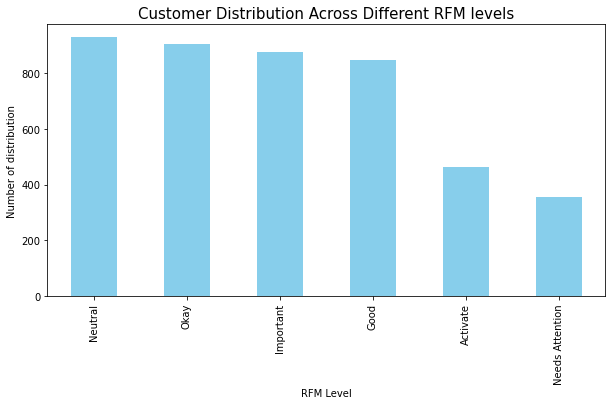

In [49]:
# Plotting the above information
# Most of the customers 1600 plus are in the important RFM_segment
RFM_table['RFM_Level'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'skyblue')
plt.xlabel('RFM Level')
plt.ylabel('Number of distribution')
plt.title('Customer Distribution Across Different RFM levels', fontsize = 15)
plt.show()

### Create clusters using k means clustering algorithm

##### Prepare the data for the algorithm

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [51]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionMonth,CohortMonth,CohortIndex,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [52]:
#If the data is Un Symmetrically distributed, manage the skewness with appropriate transformation.
raw_data.head()
cols=['CustomerID','Total_sales']

data = raw_data[cols]

In [53]:
#split the data into train and test
x_train,x_test= train_test_split(data, test_size=0.2, random_state=43)

In [54]:
print(x_train.shape)
print(x_test.shape)


(321283, 2)
(80321, 2)


In [55]:
#Standardize / scale the data
sc = StandardScaler()

scale_train_data = sc.fit_transform(x_train)
scale_test_data = sc.fit_transform(x_test)

##### Decide the optimum number of clusters to be formed

In [56]:
# Looking for the optimum no of clusters/cluster sum of squares (WCSS)
# Sum of squared distances of samples to their closest cluster centre

wscc = []

for i in range(1,12):
    kmean = KMeans(n_clusters=i,
                  init = 'k-means++',
                  max_iter = 100,
                  n_init = 10,
                  random_state=0)
    #fit the data
    kmean.fit(scale_train_data)
    
    wscc.append(kmean.inertia_)

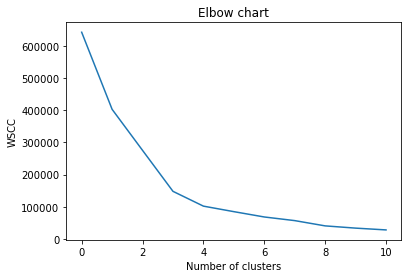

In [57]:
# Plotting the results into a line graph 
# Creating an elbow chart
# WCSS - Within cluster sum of squares
# Optimum no of clusters is 4 as per the elbow in the plot

plt.plot(wscc)
plt.title('Elbow chart')
plt.xlabel('Number of clusters')
plt.ylabel('WSCC')
plt.show()

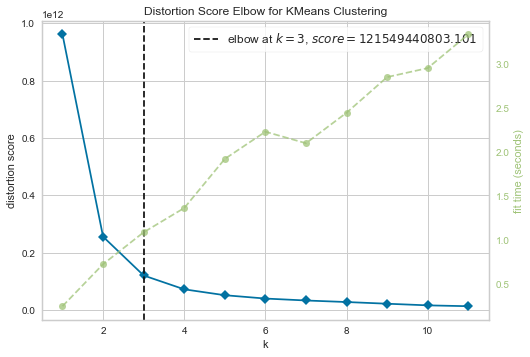

In [58]:
# Fitting the data to the graph
# Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmean, k = (1, 12))
visualizer.fit(x_train)    
visualizer.show()   
visualizer.poof()   
plt.show()

The optimum number of cluster are 3.

In [59]:
kmean = KMeans(n_clusters=3,
              init='k-means++',
              max_iter=100,
              n_init=10,
              random_state=0)

#predict the each custermer cluster
y_predict = kmean.fit_predict(scale_train_data)

In [60]:
x_train['Cluster']=y_predict
x_train

/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,Total_sales,Cluster
328081,16393.0,4.50,1
308530,13269.0,6.96,0
398911,16674.0,6.25,1
499280,15910.0,2.20,1
383667,12524.0,6.84,0
...,...,...,...
520359,15123.0,13.00,0
67900,17611.0,5.90,1
344243,16709.0,25.50,1
214044,15005.0,8.50,0


##### Analyse these clusters and comment on the results

In [61]:
# No of Clusters along with the no of customers in it
# We were able to build a model that can classify new customers into "low value" , "middle value" and "high value" groups
x_train.Cluster.value_counts()

0    172187
1    149094
2         2
Name: Cluster, dtype: int64

In [62]:
#get the different cluster with the full data 
x_data = raw_data[cols]

scale_x_data = sc.fit_transform(x_data)

cluster = kmean.fit_predict(scale_x_data)

raw_data['Cluster'] = cluster


/Users/gakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [63]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransactionMonth,CohortMonth,CohortIndex,Total_sales,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34,0


### Create a dashboard in tableau

In [64]:
#get the RFM data that we will use in tableau

new_data = raw_data.groupby('CustomerID').agg({'Quantity':'sum','Total_sales':'sum','Country':'max',
                                   'InvoiceNo':'max','Description':'max','InvoiceDate':'max'
                                })
new_data['RFM_score'] = RFM_table['RFM_score']
new_data

,Quantity,Total_sales,Country,InvoiceNo,Description,InvoiceDate,RFM_score
CustomerID,,,,,,,
12346.0,0,0.00,United Kingdom,C541433,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18,3
12347.0,2458,4310.00,Iceland,581180,WOODLAND DESIGN COTTON TOTE BAG,2011-12-07,12
12348.0,2341,1797.24,Finland,568172,SWEETIES STICKERS,2011-09-25,10
12349.0,631,1757.55,Italy,577609,ZINC FOLKART SLEIGH BELLS,2011-11-21,10
12350.0,197,334.40,Norway,543037,UNION JACK FLAG PASSPORT COVER,2011-02-02,5
...,...,...,...,...,...,...,...
18280.0,45,180.60,United Kingdom,545712,WOODEN UNION JACK BUNTING,2011-03-07,3
18281.0,54,80.82,United Kingdom,556464,ROBOT BIRTHDAY CARD,2011-06-12,3
18282.0,98,176.60,United Kingdom,C562808,SET OF 12 MINI LOAF BAKING CASES,2011-12-02,6


In [65]:
#Standardize / scale the data
new_train = new_data[['Total_sales','RFM_score']]

scale_new_data = sc.fit_transform(new_train)
#scale_test_data = sc.fit_transform(x_test)

In [66]:
wscc = []

for i in range(1,12):
    kmean = KMeans(n_clusters=i,
                  init = 'k-means++',
                  max_iter = 100,
                  n_init = 10,
                  random_state=0)
    #fit the data
    kmean.fit(scale_new_data)
    
    wscc.append(kmean.inertia_)

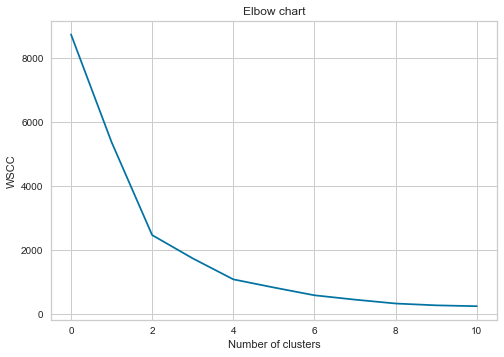

In [67]:
plt.plot(wscc)
plt.title('Elbow chart')
plt.xlabel('Number of clusters')
plt.ylabel('WSCC')
plt.show()

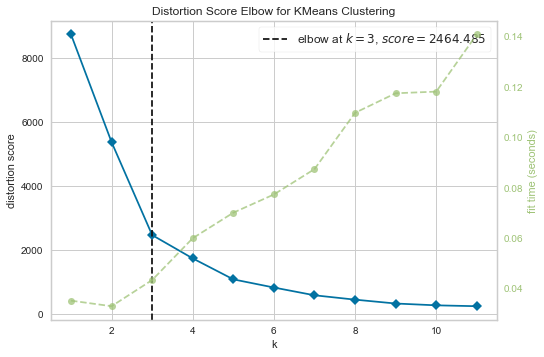

In [68]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmean, k = (1, 12))
visualizer.fit(scale_new_data)    
visualizer.show()   
visualizer.poof()   
plt.show()

In [72]:
kmean = KMeans(n_clusters=3,
              init='k-means++',
              max_iter=100,
              n_init=10,
              random_state=0)

#predict the each custermer cluster
new_y_predict = kmean.fit_predict(scale_new_data)


In [73]:
new_data['Cluster']=new_y_predict
new_data.RFM_score.value_counts()

12    495
5     478
3     462
8     456
6     450
7     448
9     438
10    409
11    380
4     356
Name: RFM_score, dtype: int64

In [78]:
RFM_table.head()

,InvoiceDate,Number_of_day,Quantity,Total_sales,R_rate,F_rate,M_rate,RFM_segment,RFM_score,RFM_Level
CustomerID,,,,,,,,,,
12346.0,2011-01-18,325 days,0,0.00,1,1,1,111,3,Activate
12347.0,2011-12-07,2 days,2458,4310.00,4,4,4,444,12,Important
12348.0,2011-09-25,75 days,2341,1797.24,2,4,4,244,10,Good
12349.0,2011-11-21,18 days,631,1757.55,3,3,4,344,10,Good
12350.0,2011-02-02,310 days,197,334.40,1,2,2,122,5,Neutral


In [81]:
new_data['R_rate'] = RFM_table['R_rate']
new_data['F_rate'] = RFM_table['F_rate']
new_data['M_rate'] = RFM_table['M_rate']
new_data['RFM_segment'] = RFM_table['RFM_segment']
RFM_data = new_data

In [83]:
RFM_data.to_csv("RFM_data.csv")

Tableau public link:
    
https://public.tableau.com/app/profile/abdoulkaledaliseini/viz/Online_reteil/Sheet5?publish=yes